## Use kNN to Predict the Age of Sea Slugs

1. Importing the Abalone Dataset and libraries

In [13]:
import pandas as pd
path=r'B:\MY COMPUTER (HOME)\2 IT\Practice works\Datasets\abalone.data.csv'
abalone = pd.read_csv(path, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
# Add column names
abalone.columns = [
 "Sex",
 "Length",
 "Diameter",
 "Height",
 "Whole weight",
 "Shucked weight",
 "Viscera weight",
 "Shell weight",
 "Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
abalone = abalone.drop("Sex", axis=1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2. Descriptive Statistics From the Abalone
Dataset

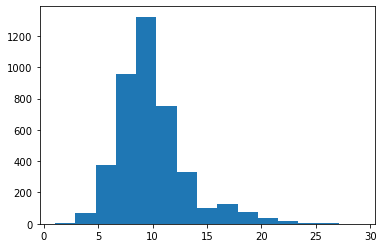

In [17]:
# A histogram will give you a quick and useful overview of the
# age ranges that you can expect:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.grid(False)
plt.show()

In [20]:
# A second relevant exploration is to find out which of the variables, if
# any, have a strong correlation with the age. A strong correlation
# between an independent variable and your goal variable would be a
# good sign, as this would confirm that physical measurements and
# age are related.

# observe the complete correlation matrix
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [21]:
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


3. KNN steps by step

In [22]:
# defining x and y values
# Note that you use a capital letter for X but a
# lowercase letter for y. This is o몭en done in machine learning code
# because mathematical notation generally uses a capital letter for
# matrices and a lowercase letter for vectors.
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [24]:
# apply a kNN with k = 3 on a new abalone that has the
# following physical measurements:
# You can create the NumPy array for this data point as follows:
import numpy as np
new_data_point = np.array([
 0.569552,
 0.446407,
 0.154437,
 1.016849,
 0.439051,
 0.222526,
 0.291208,
])

In [26]:
# The next step is to compute the distances between this new data
# point and each of the data points in the Abalone Dataset using the
# following code:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [28]:
#to find out which are the three closest neighbors. 
# To do this, you need to find the IDs of the minimum distances
# You can use a method called .argsort()
# to sort the array from lowest to highest, and you can take the first k
# elements to obtain the indices of the k nearest neighbors:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

Voting or Averaging of Multiple Neighbors

In [29]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [32]:
# Average for Regression
prediction = nearest_neighbor_rings.mean()
prediction

10.0

Mode for Classification


In [33]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

## Fit kNN in Python Using scikit learn


Splitting Data Into Training and Test Sets for
Model Evaluation


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=12345)

Fitting a kNN Regression in scikit­learn to
the Abalone Dataset

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Using scikit­learn to Inspect Model Fit


In [37]:
# compute the RMSE on the training data for now
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [38]:
# compute the RMSE on the test data
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

Plotting the Fit of Your Model


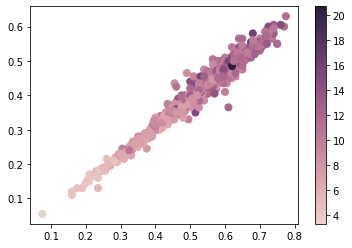

In [39]:
# scatter plot of first & second columns of X_test are Length & Diameter
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, 
                    cmap=cmap)
f.colorbar(points)
plt.show()

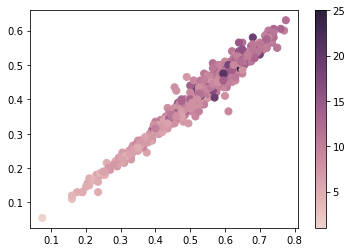

In [40]:
# To confirm whether this trend exists in actual abalone data, you can
# do the same for the actual values by simply replacing the variable
# that is used for c:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

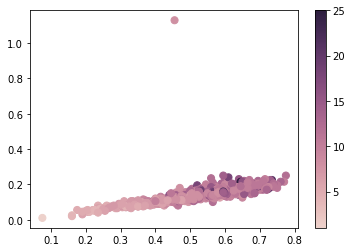

In [46]:
# scatter plots with  visualization for each combination of the seven
# independent variables
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 2], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

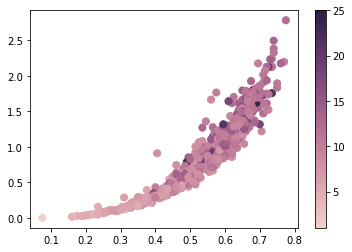

In [47]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 3], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

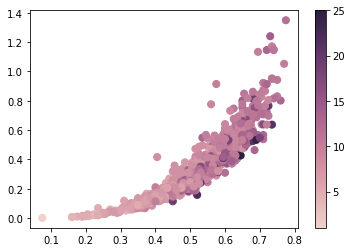

In [48]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 4], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

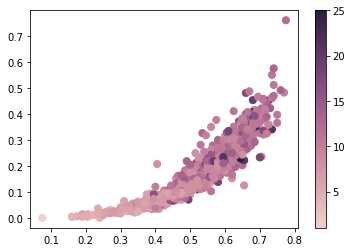

In [49]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 5], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

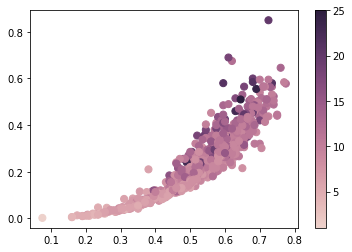

In [50]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 6], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

## Tune and Optimize kNN in Python Using scikit learn

### 1. Improving kNN Performances in scikit learn Using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [72]:
# the best performing value of k, which you
# can access with .best_params_:
gridsearch.best_params_

{'n_neighbors': 25}

In [73]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

train_rmse,test_rmse

(2.0731180327543384, 2.1700197339962175)

### 2.Adding Weighted Average of NeighborsBased on Distance

In [75]:
parameters = {
 "n_neighbors": range(1, 50),
 "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [76]:
gridsearch.best_params_


{'n_neighbors': 25, 'weights': 'distance'}

In [77]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse


2.1634265584947485

### 3.Further Improving on kNN in scikit learn With Bagging

In [84]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
n_neighbors=best_k, weights=best_weights)

In [90]:
# import the BaggingRegressor class from scikit­learn and create
# a new instance with 100 estimators using the bagged_knn model:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [93]:
# make a prediction and calculate the RMSE to see if it improved:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

#output: 2.1616

### Comparison of the Four Models

In [ ]:
# four models from simplest to most complex
# Arbitrary k                        2.37
# GridSearchCV for k                 2.17
# GridSearchCV for k and weights     2.1634
# Bagging and GridSearchCV           2.1616